 # `Capstone Project 1`

## Flight Price Prediction

### Abstract: 

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable.

'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. 


### Problem Statement:

The aim of our project is to answer the below questions:

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure? 

c) Does ticket price change based on the departure time and arrival time? 

d) How the price changes with change in Source and Destination? 

e) How does the ticket price vary between Economy and Business class? 

#### Dataset Information: 

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the dataset.

### `FEATURES`
The various features of the cleaned dataset are explained below: 

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 differentairlines. 

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels. 

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 

11) Price: Target variable stores information of the ticket price.

## `Importing libraries`

In [2]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnigns
import warnings
warnings.filterwarnings('ignore')


## `Changing Working Directory`

In [3]:
import os
os.chdir(r"C:\Users\girdh\OneDrive\Desktop\Imarticus\Capstone Project1")
os.listdir()

['Capstone Project 1_ Problem_Statement.pdf', 'Clean_Dataset.csv']

## Import dataset

In [4]:
data = pd.read_csv("Clean_Dataset.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Overview of the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#### `Removing unnamed column`

In [6]:
data.drop(["Unnamed: 0"] , axis=1,inplace=True)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.describe(percentiles=[0.05,0.1,0.25,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
duration,300153.0,12.221021,7.191997,0.83,2.17,2.75,6.83,11.25,16.17,23.67,25.92,49.83
days_left,300153.0,26.004751,13.561004,1.00,4.00,7.00,15.00,26.00,38.00,45.00,47.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,2436.00,3389.00,4783.00,7425.00,42521.00,57920.00,63277.00,123071.00


In [8]:
# We have observed that price has some outliers.
# All destination and source city is in India so 49.83 (duration) is also an outlier.

In [9]:
# lets watch it more closely...

In [10]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
duration,300153.0,12.221021,7.191997,0.83,11.25,23.67,25.92,26.33,26.75,27.5,29.08,49.83
days_left,300153.0,26.004751,13.561004,1.00,26.00,45.00,47.00,48.00,48.00,49.0,49.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,7425.00,57920.00,63277.00,65529.00,67769.00,70431.0,76736.00,123071.00


In [11]:
# so the max value of price is an outlier
# also duration of 49.83 is also an outlier, we'll repalce it with the median values.

### Check for null values

In [12]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Checking for Duplicated values

In [13]:
data.shape

(300153, 11)

In [14]:
data.duplicated().sum()

0

# `Exploratory Data Analysis`

## Univariate Analysis

###  Airline 

In [15]:
data['airline'].value_counts(normalize=True) 

Vistara      0.425979
Air_India    0.269503
Indigo       0.143660
GO_FIRST     0.077204
AirAsia      0.053633
SpiceJet     0.030021
Name: airline, dtype: float64

In [16]:
data.airline.describe()

count      300153
unique          6
top       Vistara
freq       127859
Name: airline, dtype: object

[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

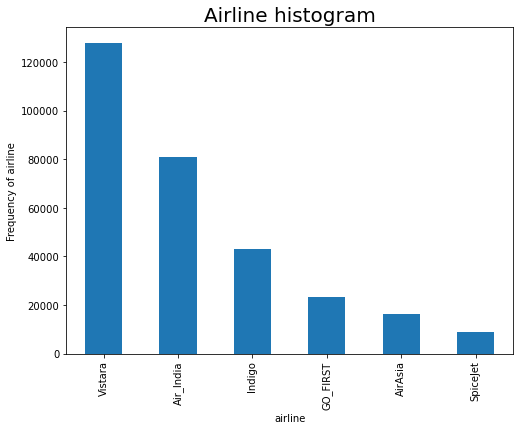

In [17]:
plt.figure(figsize=(8, 6))
plt1 = data.airline.value_counts().plot(kind='bar')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')

<AxesSubplot:ylabel='airline'>

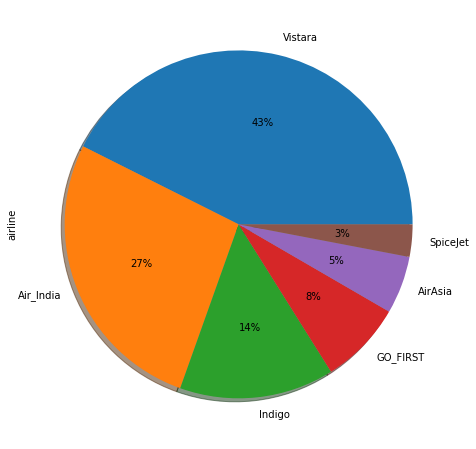

In [18]:
plt.figure(figsize=(10,8))
s = data["airline"].value_counts(ascending=False).plot(kind ="pie", autopct='%1.0f%%', shadow=True)
s

Above Analysis shows, 
* There are 6 different airline companies.
* With highest frequency, Vistara is the most preferred Airline by travellers and Spicejet is the least preferred Airline.

### Flight

In [19]:
data['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [20]:
# drop flight column
data.drop(['flight'] , axis=1, inplace=True)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Source city, Destination city

In [21]:
print('Source City:', data['source_city'].unique()
      ,"\n",
      'Destination city:',data['destination_city'].unique())

Source City: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 
 Destination city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


In [22]:
display('count of flights taking off from each source city:',
      data['source_city'].value_counts(sort=True,ascending=False))
      
display('count of flights landing at each destination city:',
      data['destination_city'].value_counts(sort=True,ascending=False))

'count of flights taking off from each source city:'

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

'count of flights landing at each destination city:'

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

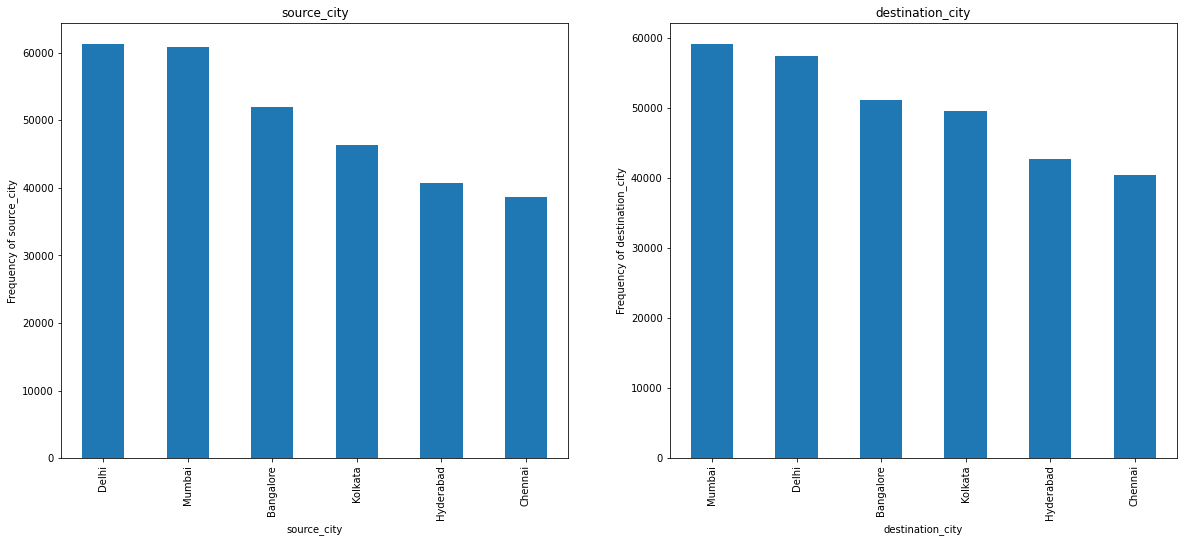

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('source_city')
plt1 = data.source_city.value_counts().plot(kind='bar')
plt1.set(xlabel = 'source_city', ylabel='Frequency of source_city')

plt.subplot(1,2,2)
plt.title('destination_city')
plt1 = data.destination_city.value_counts().plot(kind='bar')
plt1.set(xlabel = 'destination_city', ylabel='Frequency of destination_city')
plt.show()

Above Analysis shows, 
* There are 6 unique cities from which the flight takes off and land at.
* With Highest Frequency, Delhi is on top, from which most of the flights take off.
* Mumbai is the destination city where the highest numbers of flight land at.

### Departure Time, Arrival Time

In [24]:
print('Departure_time:', data['departure_time'].unique()
      ,"\n",
      'Arrival_time:',data['arrival_time'].unique())

Departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 
 Arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


In [25]:
display('Arrival time of the flights:',
      data['arrival_time'].value_counts(sort=True,ascending=False))
      
display('Departure time of the flights:',
      data['departure_time'].value_counts(sort=True,ascending=False))

'Arrival time of the flights:'

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

'Departure time of the flights:'

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

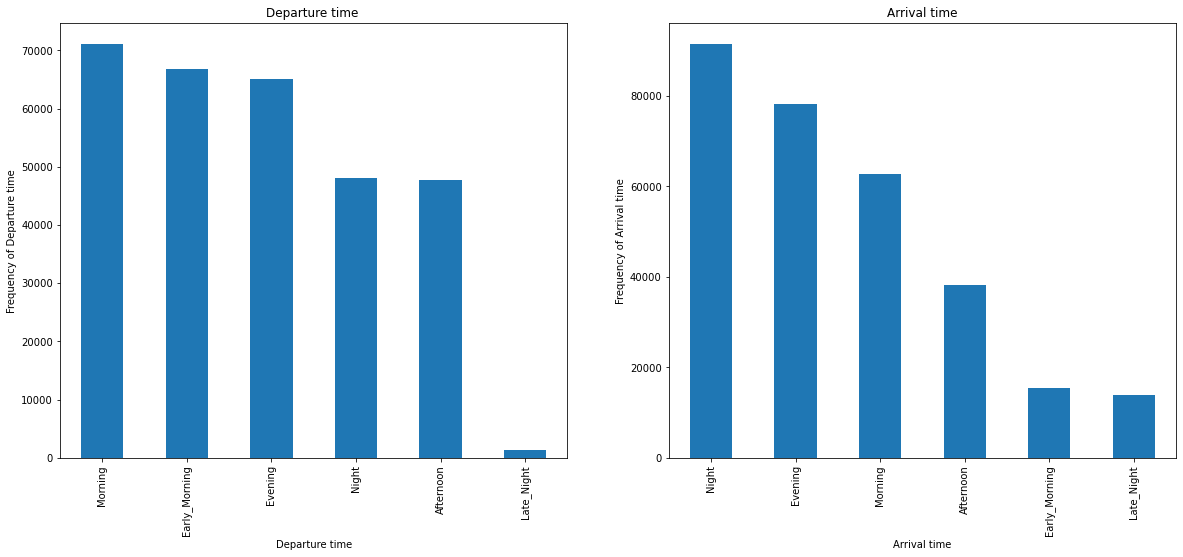

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Departure time ')
plt1 = data.departure_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Departure time', ylabel='Frequency of Departure time')

plt.subplot(1,2,2)
plt.title('Arrival time')
plt1 = data.arrival_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Arrival time', ylabel='Frequency of Arrival time')
plt.show()

##### This shows that most of the departing flights are in the morning and most arrival flights are during night. Very few Late night departure and arrival of flights.

### Class

In [27]:
data['class'].value_counts(normalize= True) 

Economy     0.688536
Business    0.311464
Name: class, dtype: float64

<AxesSubplot:title={'center':'Class Histogram'}, xlabel='class', ylabel='count'>

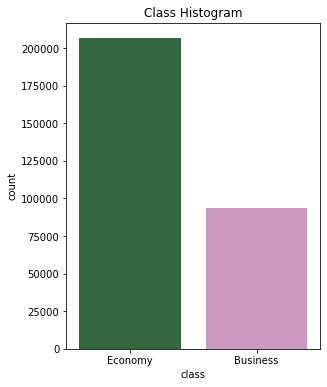

In [28]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('Class Histogram')
sns.countplot(data['class'], palette=("cubehelix"))

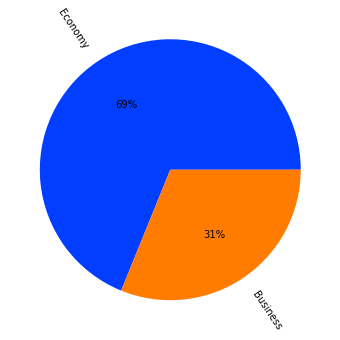

In [29]:
def pie_chart(x):
    palette_color = sns.color_palette('bright')

    values = [  ]
    for i in x.value_counts():
        values.append(i)

    label = x.unique()
    
    plt.pie(values, labels=label, colors=palette_color ,autopct='%.0f%%', rotatelabels=True )
    
    return plt.show()

plt.figure(figsize=(10,6))
pie_chart(data["class"])

Above Analysis shows, 
* Class has two distinct values: Business and Economy.
* It contains information on seat class. Economy Class flights are higher in number in comparison with Business Class as you can see about 69% of people booked tickets in economy class.

### Stops

In [30]:
data['stops'].value_counts(normalize= True)

one            0.835784
zero           0.119952
two_or_more    0.044264
Name: stops, dtype: float64

In [31]:
# a little bit of feature engineering is required here 

data['stops'] = data['stops'].map({'zero' : 0,'one':1,'two_or_more':2})
data["stops"].unique(),data['stops'].value_counts()

(array([0, 1, 2], dtype=int64),
 1    250863
 0     36004
 2     13286
 Name: stops, dtype: int64)

<AxesSubplot:title={'center':'stops Histogram'}, xlabel='stops', ylabel='count'>

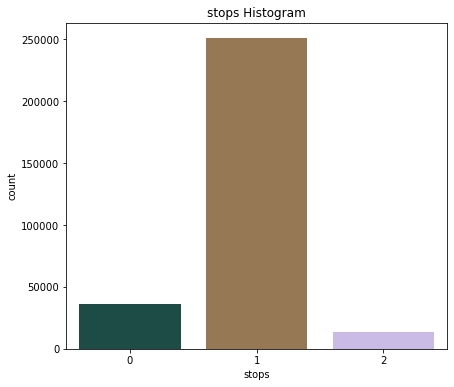

In [32]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('stops Histogram')
sns.countplot(data['stops'], palette=("cubehelix"))

<AxesSubplot:ylabel='stops'>

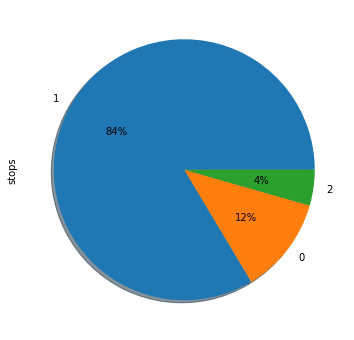

In [33]:
plt.figure(figsize=(10,6))
data["stops"].value_counts(ascending=False).plot(kind ="pie",y="stops", autopct='%1.0f%%', shadow=True, )

Above Analysis shows, 
* Stop stores the number of stops between the source and destination cities.
* It shows three distinct values: Zero(no stop), One Stop, Two Stop
* 84% (approx) flights have only one stop.

### Days Left

In [34]:
data.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [35]:
data.days_left.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

<AxesSubplot:xlabel='days_left'>

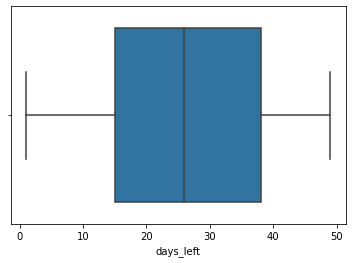

In [36]:
sns.boxplot(data['days_left'])

* This shows the number of days between booking date and trip date. 
* It is showing a range from 1-49 days between booking date and trip date.
* People are booking their flights on an average of 26 days before trip date.


### Price

In [37]:
data.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

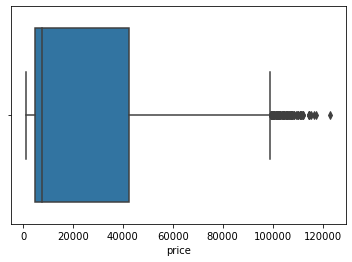

In [38]:
sns.boxplot(data['price'])

* This shows the ticket price of the flights.
* It is showing some outliers which is due to other factors like Seating class of the flights and the days before which the flight is booked.
* Business Class flights which are booked last minute would show high prices(which are acting as outliers in given data).

<AxesSubplot:xlabel='price', ylabel='Density'>

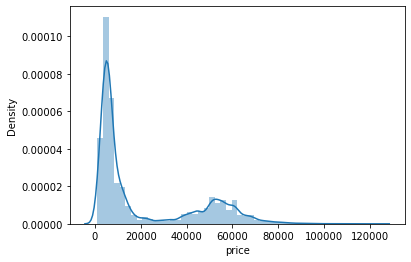

In [39]:
sns.distplot(data['price'])

Even though the mean is around 20000, we can see here that the median is approximately 7500. This difference is explainable by the presence of two different tickets: business and economy. On the graph, we can see that the dispersion seems to be composed by two gaussian curves.

## Our Source and Destination Cities

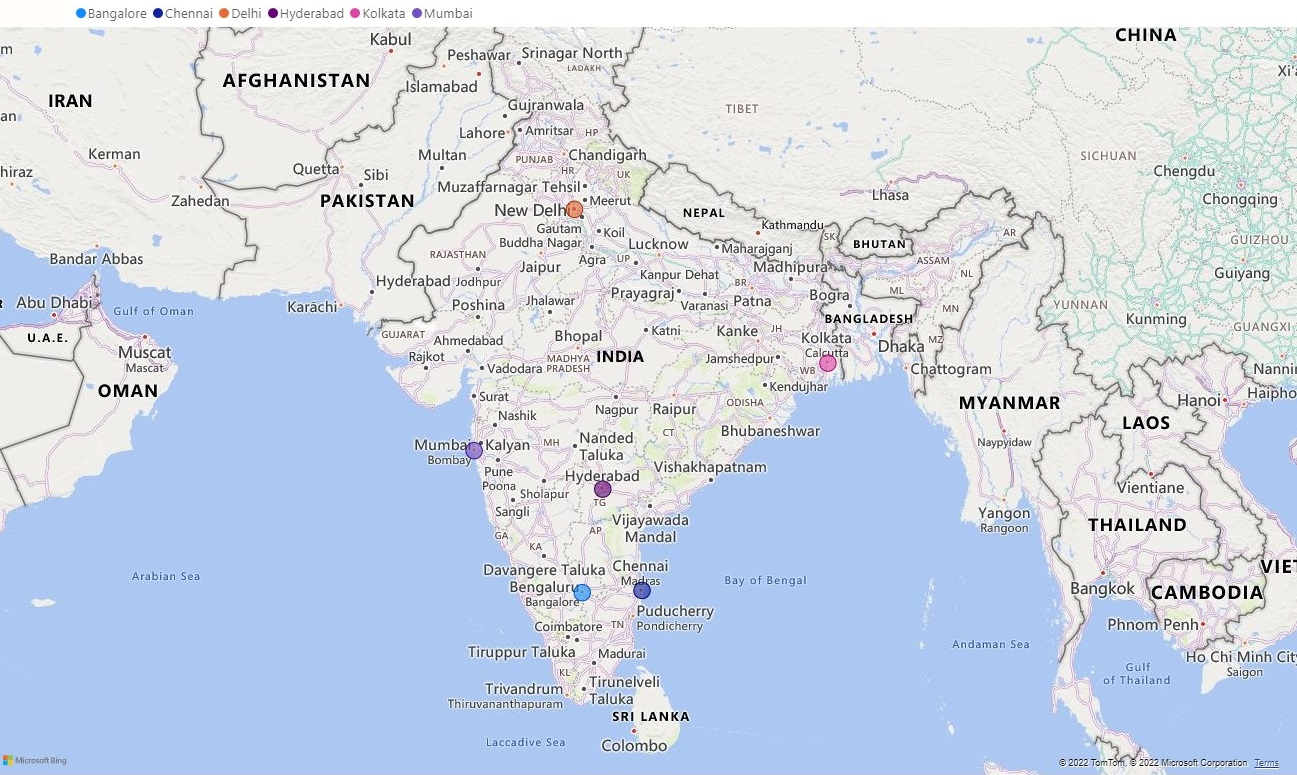

# Bivariate Analysis ( Numerical - Numerical)

## 1. How is the price affected when tickets are bought in just 1 or 2 days before departure?

To visualize how the prices changes depending on the number of days left, lets calculate the average price depending on the days left, to try to understand a pattern in the curve.

In [40]:
df_temp = data.groupby(['days_left'])['price'].mean().reset_index()
df_temp

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


<AxesSubplot:xlabel='days_left', ylabel='price'>

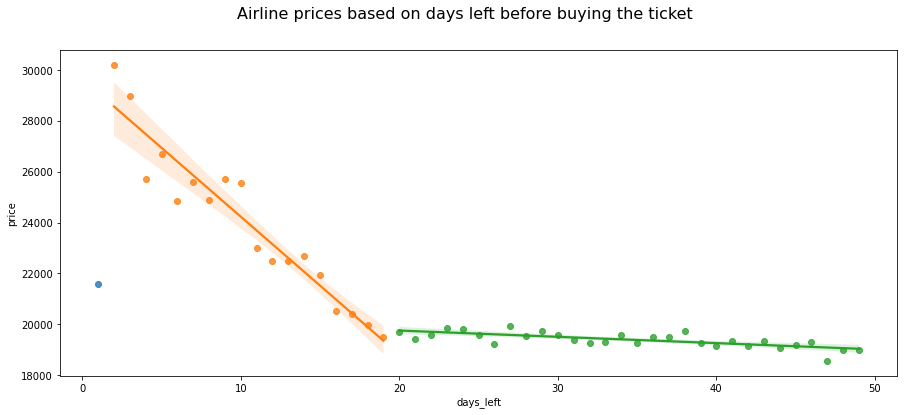

In [41]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

# 2. Does the price change with the duration of the flight?

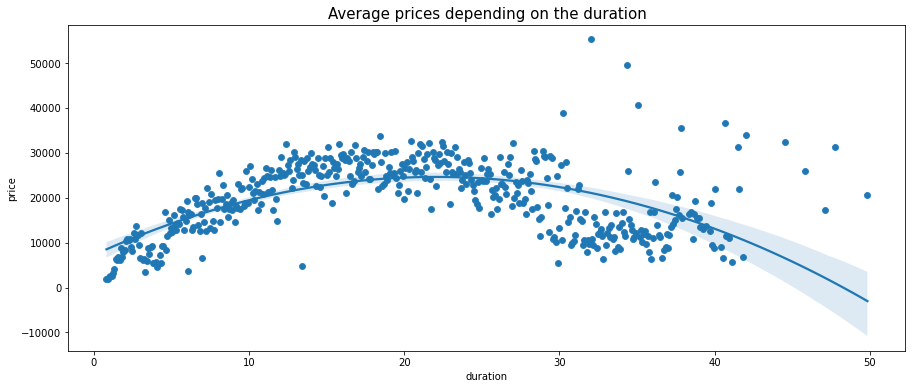

In [42]:
# Let's see how the duration of the flight may affect the final price.
df_temp = data.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prices depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

 It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve .

## Correlation Matrix

<AxesSubplot:>

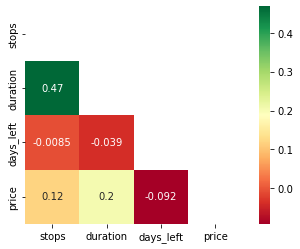

In [50]:
# Correlation
corr= data.corr()
# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix,cmap='RdYlGn',square=True)

This is showing that there is no strong correlation between dependent and independent variables(numerical).

# `Bivariate Analysis` ( Categorical - Categorical)

### Categorical features - Airline, Class

### 3. How does the ticket price vary between Economy and Business class?

In [44]:
pd.crosstab(data['airline'], data['class'])

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


<AxesSubplot:xlabel='class', ylabel='airline'>

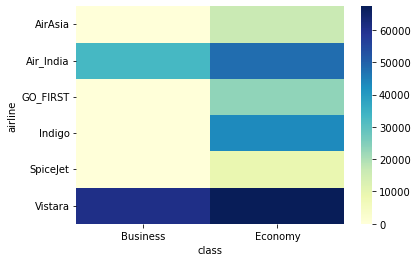

In [46]:
sns.heatmap(pd.crosstab(data['airline'], data['class']),cmap="YlGnBu")

Above analysis shows the count of flights of each airline based on class(seating class). 

* Business class seating is offered by only Vistara and Air India airline company.
* Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.
* Vistara airline is the most preferred airline company for both seating classes. 

### Categorical features - Source City , Destination City

In [47]:
pd.crosstab(data['destination_city'], data['source_city'])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
destination_city,,,,,,
Bangalore,0,6493,14012,7854,9824,12885
Chennai,6410,0,10780,6395,6653,10130
Delhi,13756,9783,0,8506,10506,14809
Hyderabad,8928,6103,9328,0,7897,10470
Kolkata,10028,6983,11934,7987,0,12602
Mumbai,12939,9338,15289,10064,11467,0


This shows the count of flights from Source city to Destination city.
* Delhi-Mumbai and Mumbai-Delhi are the busiest airline routes in india as highest number of flights took off between these two Cities.
* Delhi-Banglaore and Banglore-Delhi are the second busiest routes. 

# Bivariate Analysis ( Categorical - Numerical)

In [48]:
data.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

### Categorical feature - Airline,  Numerical feature - Price

## 4. Does price vary with Airlines?

In [49]:
data.groupby('airline')['price'].mean().sort_values(ascending = False) # Average Price of each airline company

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


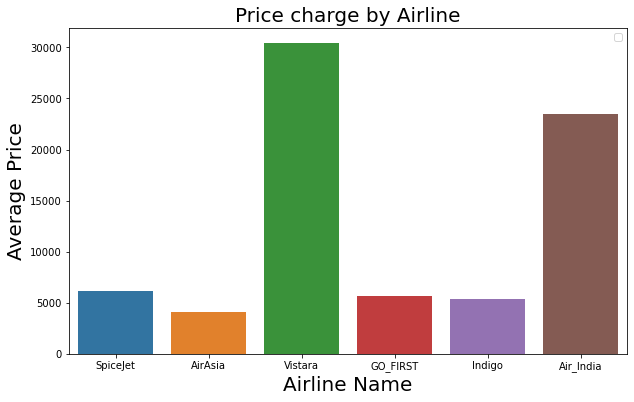

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x="airline" , y ="price" ,ci=False , data=data,)
plt.xlabel("Airline Name", fontsize=20)
plt.ylabel("Average Price", fontsize=20)
plt.title("Price charge by Airline" ,  fontsize=20)
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Airline prices based on the class and company')

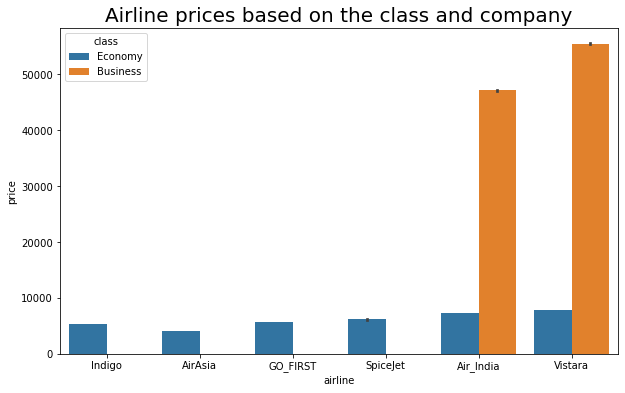

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline',y='price',hue="class",data=data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

Above analysis shows the count of flights of each airline based on class(seating class). 

* Business class seating is offered by only Vistara and Air India airline company.
* Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.
* Vistara airline is the most preferred airline company for both seating classes. 

### Categorical feature - Class,  Numerical feature - Price

In [52]:
data.groupby('class')['price'].mean().sort_values(ascending = False) # average price of each class

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Average Price')]

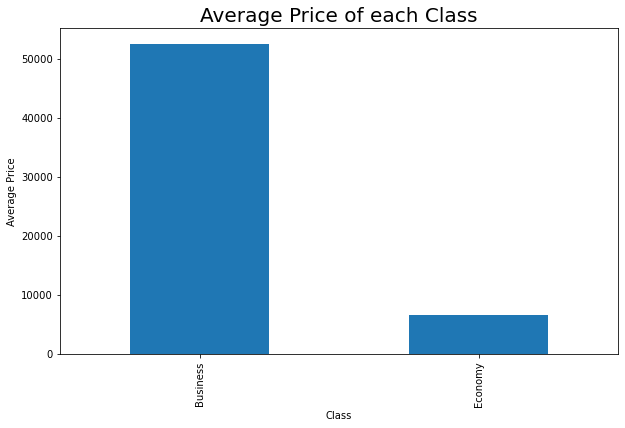

In [53]:
plt.figure(figsize=(10, 6))
plt1 = data.groupby('class')['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Average Price of each Class', fontsize=20)
plt1.set(xlabel = 'Class', ylabel='Average Price')

In [54]:
data.groupby(['class']).agg({"price":['mean','max','min','std']})

price                             
                  mean     max    min           std
class                                              
Business  52540.081124  123071  12000  12969.314606
Economy    6572.342383   42349   1105   3743.519517

## 5. How the price changes with change in Source and Destination?

Text(0.5, 1.0, 'Airline prices based on Source City')

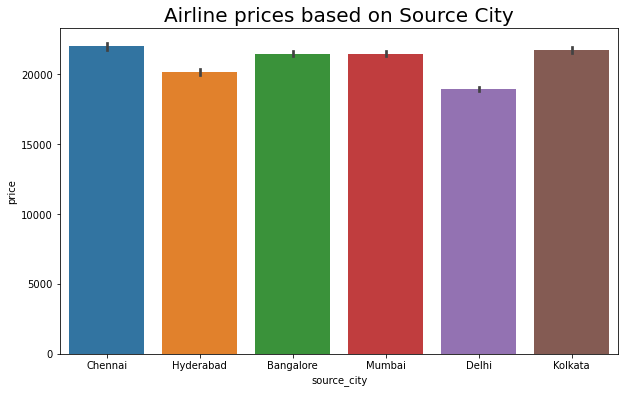

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='source_city',y='price',data=data.sort_values("price")).set_title('Airline prices based on Source City',fontsize=20)

Text(0.5, 1.0, 'Airline prices based on Destination City')

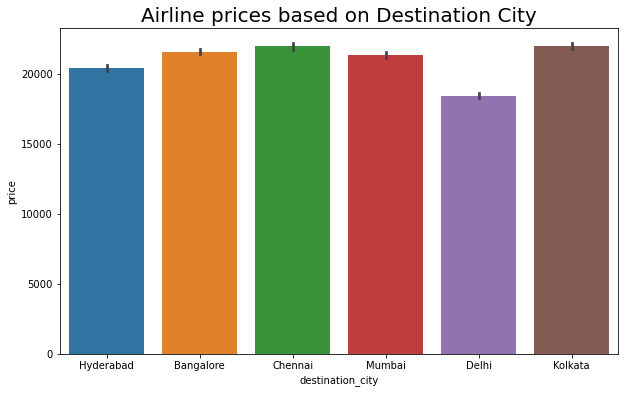

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='destination_city',y='price',data=data.sort_values("price")).set_title('Airline prices based on Destination City',fontsize=20)

* On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest destination to go probably because as a capital cities, the airport is the biggest and proposes more flights. 
* On an other hand, the prices are more or less similar.

## 6. Does ticket price change based on the departure time and arrival time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

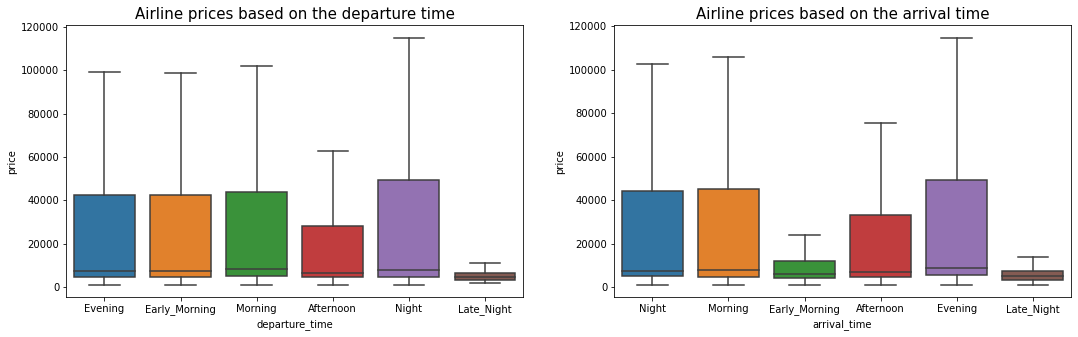

In [57]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

As expected, leaving at late night or arriving at late night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

In [58]:
# Arrival time and departure time is not going to effect our price so it is irrelvant here
data.drop(['departure_time','arrival_time'],axis=1,inplace=True)
data.head()

,airline,source_city,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,0,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,0,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,0,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,0,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,0,Mumbai,Economy,2.33,1,5955


## Outliers Treatment

In [59]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
stops,300153.0,0.924312,0.398106,0.00,1.00,1.00,1.00,2.00,2.00,2.0,2.00,2.00
duration,300153.0,12.221021,7.191997,0.83,11.25,23.67,25.92,26.33,26.75,27.5,29.08,49.83
days_left,300153.0,26.004751,13.561004,1.00,26.00,45.00,47.00,48.00,48.00,49.0,49.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,7425.00,57920.00,63277.00,65529.00,67769.00,70431.0,76736.00,123071.00


### Duration

In [60]:
data[data['duration']>=48]

,airline,source_city,stops,destination_city,class,duration,days_left,price
193889,Air_India,Chennai,2,Bangalore,Economy,49.83,2,23891
194359,Air_India,Chennai,1,Bangalore,Economy,49.83,9,17538


In [61]:
data['duration'].median()

11.25

In [62]:
# as there are only 2 values thus we can repalce it with median value
data['duration'] = np.where(data['duration']>=48 ,data['duration'].median(), data['duration'])

### Price

In [63]:
data[data['price']>=100000]

,airline,source_city,stops,destination_city,class,duration,days_left,price
215858,Vistara,Delhi,2,Kolkata,Business,21.08,1,114434
215859,Vistara,Delhi,2,Kolkata,Business,21.08,1,116562
216025,Vistara,Delhi,2,Kolkata,Business,17.58,4,100395
216095,Vistara,Delhi,1,Kolkata,Business,8.00,5,101369
216096,Vistara,Delhi,2,Kolkata,Business,10.92,5,117307
...,...,...,...,...,...,...,...,...
293474,Vistara,Chennai,1,Bangalore,Business,9.67,3,107597
296001,Vistara,Chennai,1,Kolkata,Business,11.50,3,102832
296081,Vistara,Chennai,1,Kolkata,Business,15.83,5,102384
296170,Vistara,Chennai,1,Kolkata,Business,11.50,7,104624


In [64]:
## 108 values are very less as compare to our total no to rows, se lets also replace these values with median

data['price'] = np.where(data['price']>=100000 ,data['price'].median(),data['price'])

In [65]:
#Lets check the changes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stops,300153.0,0.924312,0.398106,0.00,1.00,1.00,1.00,2.00
duration,300153.0,12.220764,7.191342,0.83,6.83,11.25,16.17,47.75
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20854.421085,22642.385332,1105.00,4783.00,7425.00,42521.00,99680.00


## Feature engineering

In [66]:
# Flight from Mumbai and Delhi (having same route i.e same stops and airline) can be combined

data['source_destination'] = data['source_city'] + "_" + data['destination_city']
data.head()

,airline,source_city,stops,destination_city,class,duration,days_left,price,source_destination
0,SpiceJet,Delhi,0,Mumbai,Economy,2.17,1,5953.0,Delhi_Mumbai
1,SpiceJet,Delhi,0,Mumbai,Economy,2.33,1,5953.0,Delhi_Mumbai
2,AirAsia,Delhi,0,Mumbai,Economy,2.17,1,5956.0,Delhi_Mumbai
3,Vistara,Delhi,0,Mumbai,Economy,2.25,1,5955.0,Delhi_Mumbai
4,Vistara,Delhi,0,Mumbai,Economy,2.33,1,5955.0,Delhi_Mumbai


In [67]:
# so now there is no need of source city and destiantion city
data.drop(['source_city','destination_city'] , axis=1,inplace=True)
data.head()

,airline,stops,class,duration,days_left,price,source_destination
0,SpiceJet,0,Economy,2.17,1,5953.0,Delhi_Mumbai
1,SpiceJet,0,Economy,2.33,1,5953.0,Delhi_Mumbai
2,AirAsia,0,Economy,2.17,1,5956.0,Delhi_Mumbai
3,Vistara,0,Economy,2.25,1,5955.0,Delhi_Mumbai
4,Vistara,0,Economy,2.33,1,5955.0,Delhi_Mumbai


### Lets combine source city and destination city and check price rate on basis of days before tickets were booked

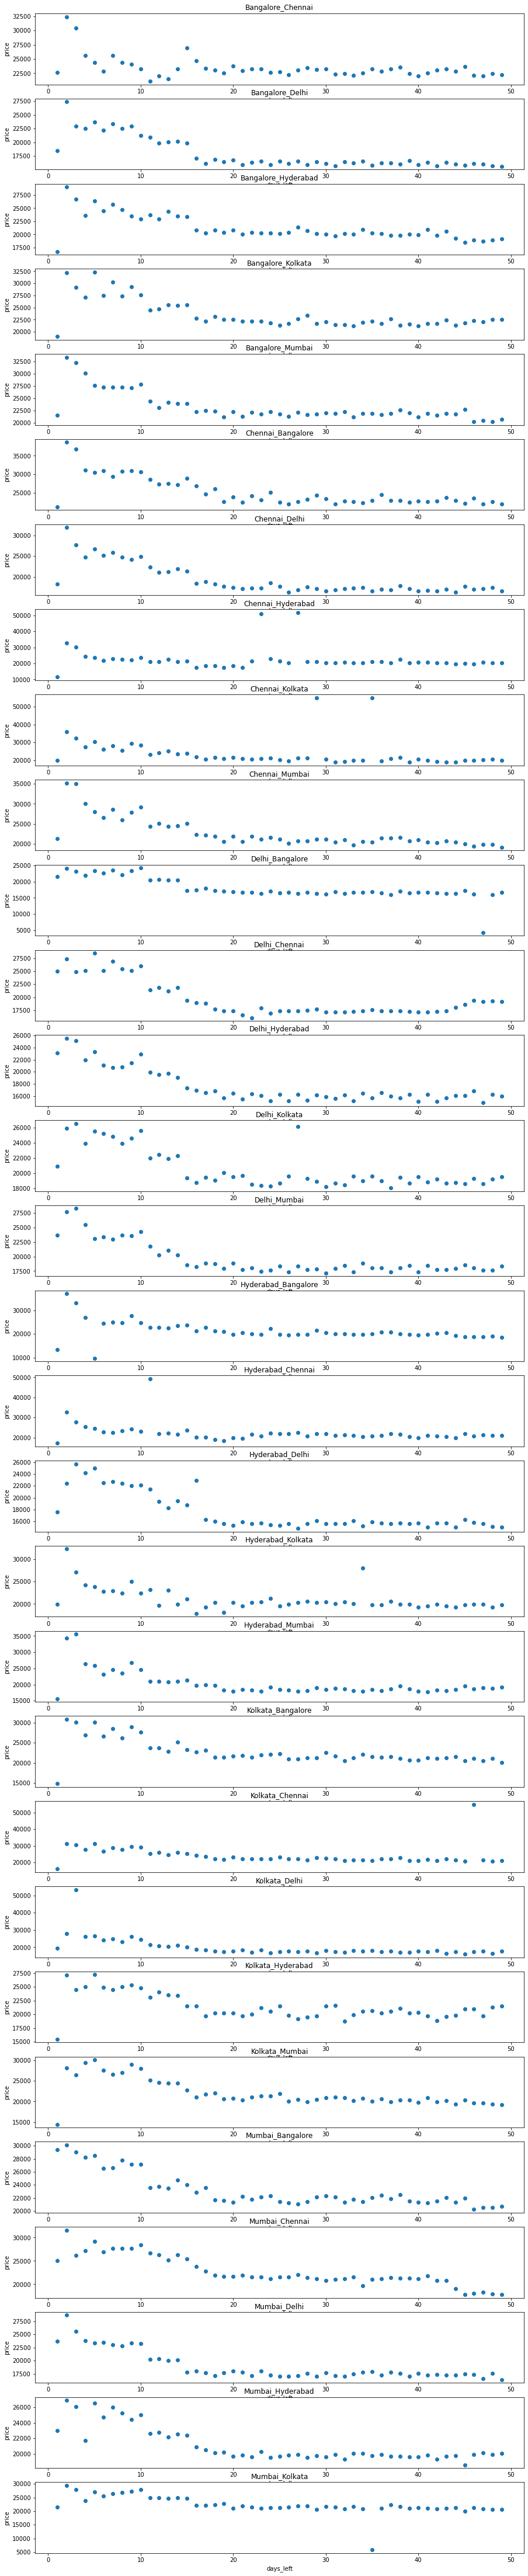

In [68]:
plt.figure(figsize=(15,80))
grp = data.groupby(['source_destination','days_left'])['price'].mean().reset_index()
for indx, val in enumerate(grp.source_destination.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = grp.loc[grp['source_destination'] == val]
    plt.scatter(temp_df['days_left'], temp_df['price'])
    plt.title(val)
    plt.xlabel('days_left')
    plt.ylabel('price')

### Prices are low when a ticket is booked many days before the departure and price increases as the days left get reduced. Also there is a drop in prices one day before the departure.

In [69]:
print(data.source_destination.unique() , '\n' , data.source_destination.nunique())

['Delhi_Mumbai' 'Delhi_Bangalore' 'Delhi_Kolkata' 'Delhi_Hyderabad'
 'Delhi_Chennai' 'Mumbai_Delhi' 'Mumbai_Bangalore' 'Mumbai_Kolkata'
 'Mumbai_Hyderabad' 'Mumbai_Chennai' 'Bangalore_Delhi' 'Bangalore_Mumbai'
 'Bangalore_Kolkata' 'Bangalore_Hyderabad' 'Bangalore_Chennai'
 'Kolkata_Delhi' 'Kolkata_Mumbai' 'Kolkata_Bangalore' 'Kolkata_Hyderabad'
 'Kolkata_Chennai' 'Hyderabad_Delhi' 'Hyderabad_Mumbai'
 'Hyderabad_Bangalore' 'Hyderabad_Kolkata' 'Hyderabad_Chennai'
 'Chennai_Delhi' 'Chennai_Mumbai' 'Chennai_Bangalore' 'Chennai_Kolkata'
 'Chennai_Hyderabad'] 
 30


In [70]:
# Delhi_Mumbai and Mumbai_Delhi , Mumbai_Hyderabad and Hyderabad_Mumbai become multiple routes, lets simplify it


data['source_destination']=np.where(data['source_destination']=='Delhi_Chennai', "Chennai_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Mumbai', "Mumbai_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Bangalore', "Bangalore_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Kolkata', "Kolkata_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Hyderabad', "Hyderabad_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Bangalore', "Bangalore_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Kolkata', "Kolkata_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Hyderabad', "Hyderabad_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Chennai', "Chennai_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Kolkata', "Kolkata_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Hyderabad', "Hyderabad_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Chennai', "Chennai_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Kolkata_Hyderabad', "Hyderabad_Kolkata", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Kolkata_Chennai', "Chennai_Kolkata", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Hyderabad_Chennai', "Chennai_Hyderabad", data['source_destination'])

data.head()

,airline,stops,class,duration,days_left,price,source_destination
0,SpiceJet,0,Economy,2.17,1,5953.0,Mumbai_Delhi
1,SpiceJet,0,Economy,2.33,1,5953.0,Mumbai_Delhi
2,AirAsia,0,Economy,2.17,1,5956.0,Mumbai_Delhi
3,Vistara,0,Economy,2.25,1,5955.0,Mumbai_Delhi
4,Vistara,0,Economy,2.33,1,5955.0,Mumbai_Delhi


In [71]:
print(data.source_destination.unique() , '\n' , data.source_destination.nunique())

['Mumbai_Delhi' 'Bangalore_Delhi' 'Kolkata_Delhi' 'Hyderabad_Delhi'
 'Chennai_Delhi' 'Bangalore_Mumbai' 'Kolkata_Mumbai' 'Hyderabad_Mumbai'
 'Chennai_Mumbai' 'Kolkata_Bangalore' 'Hyderabad_Bangalore'
 'Chennai_Bangalore' 'Hyderabad_Kolkata' 'Chennai_Kolkata'
 'Chennai_Hyderabad'] 
 15


In [72]:
# there is a range of 1-49 days left before trip date , which are discrete values.
# lets group the days into weeks.

data['weeks_before'] = data['days_left']
data['weeks_before'] = np.where(data['weeks_before']<=7 ,'week1',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>7) & (data['days_left']<=14) ,'week2',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>14) & (data['days_left']<=21) ,'week3',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>21) & (data['days_left']<=28) ,'week4',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>28) & (data['days_left']<=35) ,'week5',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>35) & (data['days_left']<=42) ,'week6',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>42) & (data['days_left']<=49) ,'week7',data['weeks_before'])

In [73]:
#droping daysleft column

data.drop(['days_left'] , axis=1,inplace=True)

data.head()

,airline,stops,class,duration,price,source_destination,weeks_before
0,SpiceJet,0,Economy,2.17,5953.0,Mumbai_Delhi,week1
1,SpiceJet,0,Economy,2.33,5953.0,Mumbai_Delhi,week1
2,AirAsia,0,Economy,2.17,5956.0,Mumbai_Delhi,week1
3,Vistara,0,Economy,2.25,5955.0,Mumbai_Delhi,week1
4,Vistara,0,Economy,2.33,5955.0,Mumbai_Delhi,week1


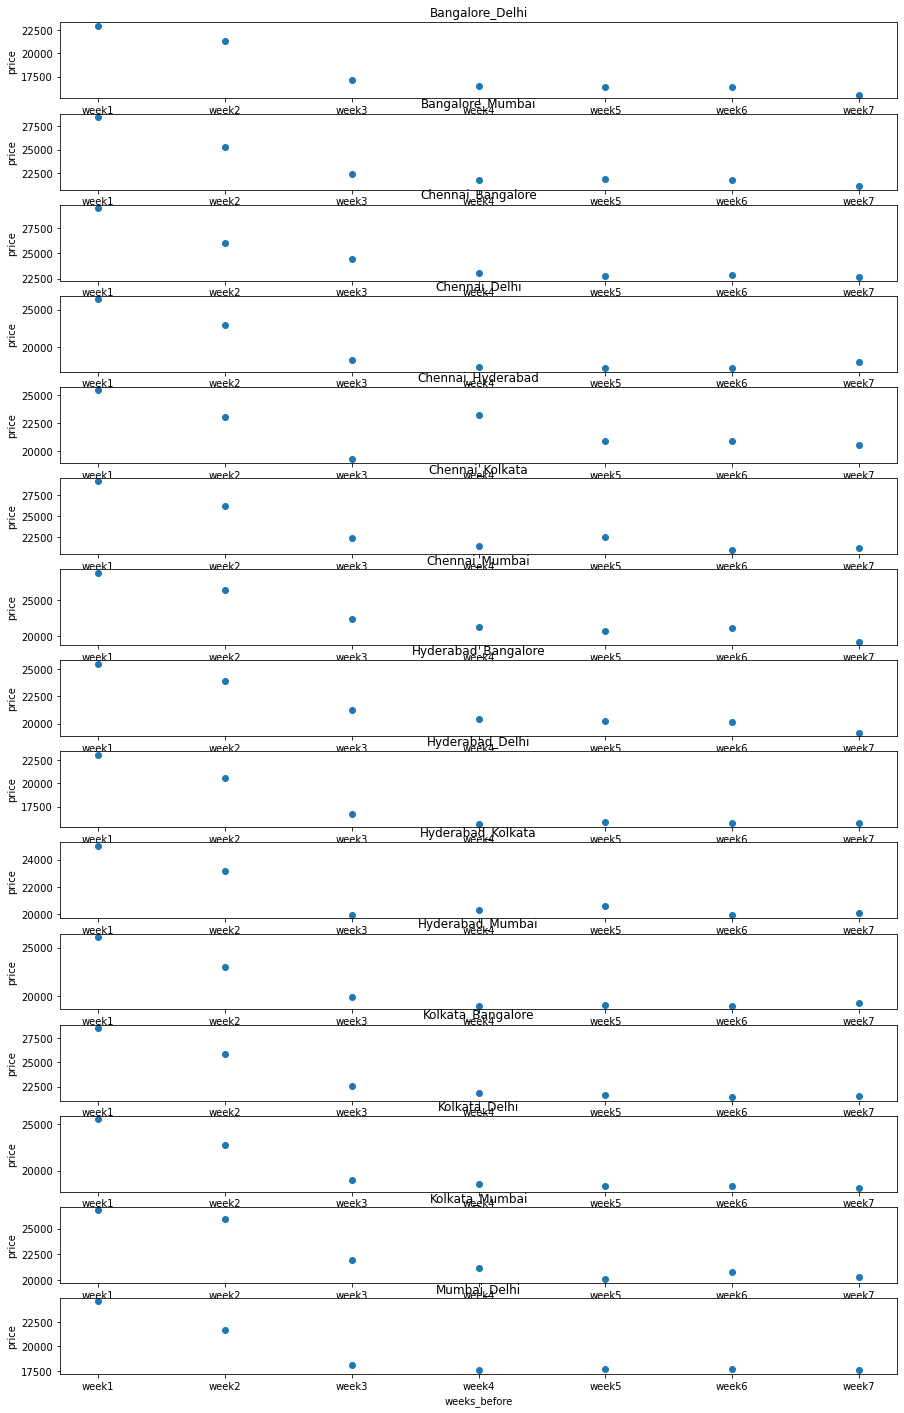

In [74]:
plt.figure(figsize=(15,50))
grp2 = data.groupby(['source_destination','weeks_before'])['price'].mean().reset_index()
for indx, val in enumerate(grp2.source_destination.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = grp2.loc[grp2['source_destination'] == val]
    plt.scatter(temp_df['weeks_before'], temp_df['price'])
    plt.title(val)
    plt.xlabel('weeks_before')
    plt.ylabel('price')

### The Avg Price of the flights are quiet high in the last 2 weeks of booking trip.

In [75]:
data['class']= np.where(data['class']=='Economy',1,0)
data.head()

,airline,stops,class,duration,price,source_destination,weeks_before
0,SpiceJet,0,1,2.17,5953.0,Mumbai_Delhi,week1
1,SpiceJet,0,1,2.33,5953.0,Mumbai_Delhi,week1
2,AirAsia,0,1,2.17,5956.0,Mumbai_Delhi,week1
3,Vistara,0,1,2.25,5955.0,Mumbai_Delhi,week1
4,Vistara,0,1,2.33,5955.0,Mumbai_Delhi,week1


## Dummies Creation

In [76]:
df = pd.get_dummies(data=data,drop_first=True)
df.head()

,stops,class,duration,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_destination_Bangalore_Mumbai,...,source_destination_Kolkata_Bangalore,source_destination_Kolkata_Delhi,source_destination_Kolkata_Mumbai,source_destination_Mumbai_Delhi,weeks_before_week2,weeks_before_week3,weeks_before_week4,weeks_before_week5,weeks_before_week6,weeks_before_week7
0,0,1,2.17,5953.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,2.33,5953.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.17,5956.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,2.25,5955.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.33,5955.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
df.shape

(300153, 29)

# Model Training

In [78]:
# Separating dependent and independent variables
x= df.drop(["price"], axis=1)
y = df["price"]

In [79]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

In [80]:
x_train.shape

(210107, 28)

# Linear regression

In [81]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting data
scaler.fit(x_train)

#transforming data onto x adn y train
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
x_train.shape, x_test.shape

((210107, 28), (90046, 28))

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

In [84]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.9108172817697512

In [85]:
## for making model more efficient
resduals = []
for i in range(0,101):
    x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    resduals.append(r2_score(y_test,y_pred))

In [86]:
# greatest r2 score 
np.argmax(resduals)

85

In [87]:
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=85)


lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print( "Train score is :-", lr.score(x_train,y_train))
print( "Test score is :-", r2_score(y_test,y_pred_lr))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_lr))


Train score is :- 0.9105558756385401
Test score is :- 0.9129750406042052
MAE = 4369.123453429492


## SGDRegressor

In [88]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(max_iter= 10000, epsilon= 0.0002, loss="squared_loss")

#fiting the model
sgd.fit(x_train, y_train)

y_pred_sgd = sgd.predict(x_test)

print("Train score is :-",sgd.score(x_train , y_train) )
print("Train score is :-",sgd.score(x_test , y_test) )
print( "MAE =" ,mean_absolute_error(y_test, y_pred_sgd))

Train score is :- 0.9104309633795682
Train score is :- 0.9128621526032541
MAE = 4357.730492796779


## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {"max_depth" : (100,120,150,),
              "max_features" : ("auto","sqrt","log2"),
              "max_leaf_nodes" : (3,4,5),
              "min_samples_split" : (4,6,8,10),
              "min_samples_leaf" : (2,3,4,5,6)}

In [91]:
dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1,cv=10,verbose=2)
dt_grid

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': (100, 120, 150),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'max_leaf_nodes': (3, 4, 5),
                         'min_samples_leaf': (2, 3, 4, 5, 6),
                         'min_samples_split': (4, 6, 8, 10)},
             verbose=2)

In [92]:
# fitting the model
dt_grid.fit(x_train,y_train)

#predicting y
y_pred_dt = dt_grid.predict(x_test)


print(dt_grid.best_params_ )
print("Train Score is :-" , dt_grid.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt))

Fitting 10 folds for each of 540 candidates, totalling 5400 fits
{'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Train Score is :- 0.92599782254466
Test Score is :- 0.92877626223498


In [108]:
params = {"max_depth" : (100,90,80,),
              "max_features" : ("auto","sqrt"),
              "max_leaf_nodes" : (2,5,7),
              "min_samples_split" : (4,5,3),
              "min_samples_leaf" : (2,3)}

dt_grid2 = GridSearchCV(dt1 , param_grid=params,refit=True, n_jobs=-1,cv=10,verbose=2)

# fitting the model
dt_grid2.fit(x_train,y_train)

#predicting y
y_pred_dt2 = dt_grid2.predict(x_test)


print(dt_grid2.best_params_ )
print("Train Score is :-" , dt_grid2.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt2))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
{'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}
Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279


In [100]:
dt2 =DecisionTreeRegressor(max_depth= 100,
                           max_features= 'auto',
                           max_leaf_nodes= 7,
                           min_samples_leaf= 2,
                           min_samples_split= 4,
                           random_state= 10)


# fitting the model
dt2.fit(x_train,y_train)

#predicting y
y_pred_dt = dt2.predict(x_test)

print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))


Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279
MAE = 3766.260999262443


## Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

regf = RandomForestRegressor()
  
regf_params = {"n_estimators":(10,20,30),
                'max_depth':(2,3,5),
                'min_samples_split':[3,5,7],
                'min_samples_leaf':[2,4],
                'max_features':['auto','sqrt']}


In [96]:
rf_GS = GridSearchCV(estimator=regf ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)
rf_GS

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (2, 3, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': (10, 20, 30)},
             verbose=2)

In [97]:
# fitting the model
rf_GS.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (2, 3, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': (10, 20, 30)},
             verbose=2)

In [98]:
#predicting y
y_pred_rf = rf_GS.predict(x_test)


print(rf_GS.best_params_ )
print("Train Score is :-" , rf_GS.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
Train Score is :- 0.9372520798272213
Test Score is :- 0.9398099460787496


In [103]:
# Tuning
regf_params2 = {"n_estimators":(10,12,8),
                'max_depth':(4,5,6),
                'min_samples_split':[4,5,6],
                'min_samples_leaf':[3,4,5],
                'max_features':['auto','sqrt']}

rf_GS2 = GridSearchCV(estimator=regf ,param_grid=regf_params2,n_jobs=-1,cv=5,verbose=2)
rf_GS2

# fitting the model
rf_GS2.fit(x_train,y_train)

#predicting y
y_pred_rf2 = rf_GS2.predict(x_test)


print(rf_GS2.best_params_ )
print("Train Score is :-" , rf_GS2.score(x_train,y_train) )
print("Test Score is :-" , rf_GS2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf2))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 12}
Train Score is :- 0.9410385096054765
Test Score is :- 0.9435514134936058
MAE = 3291.758180559611


In [104]:
rf = RandomForestRegressor(max_depth= 6,
                             max_features= 'auto',
                             min_samples_leaf= 4,
                             min_samples_split= 6,
                             n_estimators= 12)

# fitting the model
rf.fit(x_train,y_train)

#predicting y
y_pred_rf = rf.predict(x_test)

print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))

Train Score is :- 0.9412322005687936
Test Score is :- 0.9437433753556888
MAE = 3284.915304311552


# ADABoost

In [93]:
from sklearn.ensemble import AdaBoostRegressor

In [94]:
ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =85, n_estimators=100)
# fitting data
ada_boost.fit(x_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(x_test)

In [95]:
# predicting accuracy
print("Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))

Train Score is :- 0.9284569313506805
Test Score is :- 0.9309800779517223
MAE = 3876.6067858377733


##  XGBoost

In [96]:
import xgboost as xgb

regressor=xgb.XGBRegressor(eval_metric='rmsle')

from sklearn.model_selection import GridSearchCV
# set up our search grid

In [106]:
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}


In [97]:
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 5,
                           eval_metric='rmse')

regressor.fit(x_train, y_train) 

# Predict the model
y_pred_xg = regressor.predict(x_test)

# RMSE Computation
print("Train Score is :-" ,  regressor.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Train Score is :- 0.9572155945652867
Test Score is :- 0.9592765475312179
MAE = 2616.6271548488826


In [105]:
print('Linear regression scores')
print( "LR Train score is :-", lr.score(x_train,y_train))
print( "LR Test score is :-", r2_score(y_test,y_pred))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_lr))
print('\n')

#SGDRegresor
print('SGD Regressor scores')
print("Sgd Train score is :-",sgd.score(x_train , y_train) )
print("Sgd Train score is :-",sgd.score(x_test , y_test) )
print( "MAE =" ,mean_absolute_error(y_test, y_pred_sgd))
print('\n')

#Decision tree
print('DT scores')
print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))
print('\n')

#Random Forest
print('Rf scores')
print("Train Score is :-" , rf_GS2.score(x_train,y_train) )
print("Test Score is :-" , rf_GS2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf2))
print('\n')

#adaboost
print('ADA scores')
print("Ada Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Ada Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))
print('\n')

#XgBoost
print('XgBoost scores')
print("XgBoost Train Score is :-" ,  regressor.score(x_train,y_train))
print("XgBoost Test Score is :-" , r2_score(y_test, y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Linear regression scores
LR Train score is :- 0.9105558756385401
LR Test score is :- -0.9218011682441891
MAE = 4369.123453429492


SGD Regressor scores
Sgd Train score is :- 0.9104309633795682
Sgd Train score is :- 0.9128621526032541
MAE = 4357.730492796779


DT scores
Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279
MAE = 3766.260999262443


Rf scores
Train Score is :- 0.9410385096054765
Test Score is :- 0.9435514134936058
MAE = 3291.758180559611


ADA scores
Ada Train Score is :- 0.9284569313506805
Ada Test Score is :- 0.9309800779517223
MAE = 3876.6067858377733


XgBoost scores
XgBoost Train Score is :- 0.9572155945652867
XgBoost Test Score is :- 0.9592765475312179
MAE = 2616.6271548488826


## `Take away points`

1. The model that gives the best result is the `XGBRegressor` with on the test dataset an R^2 score equals to 0.9592 and MAE score equals to 2616.6.


2. There is a big gap between flight tickets in business and economy. On an average business tickets are 5 times more expensive than economy tickets.


3. Vistara and AirIndia seems to be the most expensive companies and AirAsia the cheapest. However for business tickets, only Vistara and AirIndia are available, and Vistara is slightly more expensive.


4. In general, prices rise quite slowly until 20 days before the flight where the prices rise drastically. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.


5. The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.


6. For the time of the flight:

* It seems that departure during the afternoon and late night are cheaper, and night departure is more expensive.
* It seems that arrival during the early morning, afternoon and late night are cheaper, and evening arrival is more expensive.


7. For the cities of the trip:

* Flights from Delhi are the cheapest and for others cities it seems equal on average but slightly more expensive for Chennai.
* Flights to Delhi are the cheapest and to Kolkata, the most expensive ones.